# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você.*

https://www.kaggle.com/snocco/missing-migrants-project

Me interessei pela base, por possuir uma boa variedade de tipo de features, me permitindo aplicar os conhecimentos que estou adiquirindo no curso.

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


As variáveis que serão trabalhadas são: 'REGIAO_INCIDENTE', 'ANO_INCIDENTE', 'MES_INCIDENTE, 'TOTAL_MIGRANTES_MORTOS','TOTAL_MIGRANTES_DESAPARECIDOS','TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS','QTDE_SOBREVIVENTES','QTDE_MULHERES','QTDE_HOMENS','QTDE_CRIANCAS'

Sua classificação é:

Contínuas: 'ANO_INCIDENTE', 'TOTAL_MIGRANTES_MORTOS','TOTAL_MIGRANTES_DESAPARECIDOS','TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS','QTDE_SOBREVIVENTES','QTDE_MULHERES','QTDE_HOMENS','QTDE_CRIANCAS'

Discretas: 'REGIAO_INCIDENTE', MES_INCIDENTE'


### 2) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [281]:
A base possui 5333 registros e 20 features.

Os registros são do tipo:
Inteiro: ID, ANO_INCIDENTE, TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS, QUALIDADE_PESQUISA
Object: REGIAO_INCIDENTE, DATA_INCIDENTE, MES_INCIDENTE, CAUSA_MORTE, LOCAL_INCIDENTE, INFORMACOES_PESQUISA, COORDENADAS_LOCAL_INCIDENTE,  ROTA_MIGRACAO, URL, GEOGRAFICO
Float: TOTAL_MIGRANTES_MORTOS, TOTAL_MIGRANTES_DESAPARECIDOS, QTDE_SOBREVIVENTES, QTDE_MULHERES, QTDE_HOMENS, QTDE_CRIANCAS

a) Checagem se os valores estão dentro de um limite permitido ou razoável.
As variáveis 'TOTAL_MIGRANTES_MORTOS' e 'TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS', possui o valor mínimo igual a zero, como o dataset é para analisar a quantidade ocorrida de mortos e/ou desaparecidos, zero não é um valor aceitavel. 
#dataset.drop(dataset[dataset.bedrooms==0].index ,inplace=True)
#migrantes.isnull().sum() #191 TOTAL_MIGRANTES_MORTOS vazio
migrantes = migrantes.dropna(subset=["TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS"])
#titanic = titanic.update(titanic['Idade'].fillna('9'))
migrantes.describe()

Após o preenchimento, o percentual ficou 0%. 

????????????????????????verificar o valor máximo de cada variável
TOTAL_MIGRANTES_MORTOS	                MIN: 0 - MAX: 750.000000	
TOTAL_MIGRANTES_DESAPARECIDOS	        MIN: 0 - MAX: 750.000000
TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS	MIN: 0 - MAX: 1022.000000	
QTDE_SOBREVIVENTES                      MIN: 0 - MAX: 1950.000000	
QTDE_HOMENS                             MIN: 0 - MAX: 30.000000	
QTDE_MULHERES                           MIN: 0 - MAX: 135.000000	
QTDE_CRIANCAS                           MIN: 0 - MAX: 250.000000



b) Tratamento de valores ausentes por eliminação ou substituição.

As colunas que não são de interesse, serão excluídas. São elas: ID, INFORMACOES_PESQUISA, COORDENADAS_LOCAL_INCIDENTE, URL, QUALIDADE_PESQUISA, DATA_INCIDENTE.

#migrantes.drop(['ID','INFORMACOES_PESQUISA','COORDENADAS_LOCAL_INCIDENTE','URL','QUALIDADE_PESQUISA','DATA_INCIDENTE'],axis = 1, inplace = True)
#migrantes.head()

c) Conversão do tipo de dados.
A feature MES_INCIDENTE será convertida para inteiro.



In [309]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing

migrantes = pd.read_csv("projeto_1/missing-migrants/MissingMigrants-Global.csv")
# Renomeando as features/colunas
migrantes.columns = ['ID', 'REGIAO_INCIDENTE','DATA_INCIDENTE','ANO_INCIDENTE','MES_INCIDENTE','TOTAL_MIGRANTES_MORTOS','TOTAL_MIGRANTES_DESAPARECIDOS','TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS','QTDE_SOBREVIVENTES','QTDE_MULHERES','QTDE_HOMENS','QTDE_CRIANCAS','CAUSA_MORTE','LOCAL_INCIDENTE','INFORMACOES_PESQUISA','COORDENADAS_LOCAL_INCIDENTE','ROTA_MIGRACAO','URL','GEOGRAFICO','QUALIDADE_PESQUISA']
migrantes.head(5)

In [293]:
migrantes.dtypes  #análise dos dados

In [313]:
migrantes.describe() #análise dos dados

In [295]:
# Percentual das features que não possuem valor (dados faltantes):
(migrantes.isnull().sum() / migrantes.shape[0]).sort_values(ascending=False)

In [296]:
#Preenchendo os dados faltantes com 'zero' das colunas que serão utilizadas na análise
migrantes['TOTAL_MIGRANTES_DESAPARECIDOS'].fillna(0, inplace=True)
migrantes['QTDE_CRIANCAS'].fillna(0, inplace=True)
migrantes['QTDE_SOBREVIVENTES'].fillna(0, inplace=True)
migrantes['QTDE_MULHERES'].fillna(0, inplace=True)
migrantes['QTDE_HOMENS'].fillna(0, inplace=True)
migrantes['TOTAL_MIGRANTES_MORTOS'].fillna(0, inplace=True)

# ver a porcentagem dos valores faltantes após preenchimento dos valores faltantes
(migrantes.isnull().sum() / migrantes.shape[0]).sort_values(ascending=False)

In [174]:
# Conversão do tipo de dados.
# conversão do ME_INCIDENTE para número
migrantes['MES_INCIDENTE'] = migrantes['MES_INCIDENTE'].map({'Jan': '01', 'Feb': '02','Mar': '03', 'Apr': '04','May': '05','Jun': '06','Jul': '07','Aug': '08','Sep': '09','Out': '10','Nov': '11','Dec': '12'})


4.0


Text(0.5, 1.0, 'Gráfico de QTDE de homens, mulheres e crianças mortosa (Tentativa 1)')

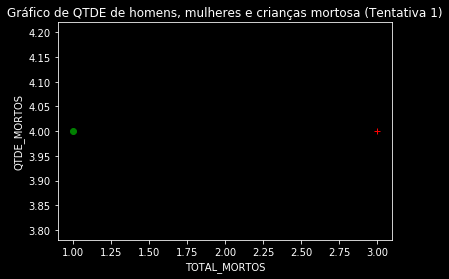

In [346]:
#plt.plot(migrantes_amostra.QTDE_MULHERES[1],migrantes_amostra.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS[1], "bx")

print(migrantes.TOTAL_MIGRANTES_MORTOS[1])

plt.plot( migrantes.QTDE_HOMENS[1],migrantes.TOTAL_MIGRANTES_MORTOS[1], "bx")
plt.plot( migrantes.QTDE_MULHERES[1],migrantes.TOTAL_MIGRANTES_MORTOS[1], "r+")
plt.plot( migrantes.QTDE_CRIANCAS[1],migrantes.TOTAL_MIGRANTES_MORTOS[1], "go")

plt.ylabel("QTDE_MORTOS")
plt.xlabel("TOTAL_MORTOS")
plt.title("Gráfico de QTDE de homens, mulheres e crianças mortosa (Tentativa 1)")

In [145]:
migrantes_amostra.describe()

Text(0.5, 1.0, 'Gráfico de QTDE de homens, mulheres e crianças mortas (Tentativa 2)')

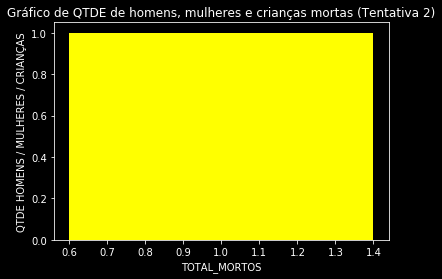

In [348]:
#grafico de barras
plt.bar(migrantes.TOTAL_MIGRANTES_MORTOS[90],migrantes.QTDE_HOMENS[90],color='yellow')
plt.bar(migrantes.TOTAL_MIGRANTES_MORTOS[90],migrantes.QTDE_MULHERES[90],color='PINK')
plt.bar(migrantes.TOTAL_MIGRANTES_MORTOS[90],migrantes.QTDE_CRIANCAS[90],color='green')

plt.ylabel("QTDE HOMENS / MULHERES / CRIANÇAS")
plt.xlabel("TOTAL_MORTOS")
plt.title("Gráfico de QTDE de homens, mulheres e crianças mortas (Tentativa 2)")

In [286]:
#ax = migrantes[migrantes["target"] == 0.0].plot.scatter("sepal width (cm)", "sepal length (cm)", c="m")

migrantes_amostra.hist(figsize=(10,8))




### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


In [289]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

Contínuas: 'ANO_INCIDENTE','TOTAL_MIGRANTES_MORTOS','TOTAL_MIGRANTES_DESAPARECIDOS','TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS','QTDE_SOBREVIVENTES','QTDE_MULHERES','QTDE_HOMENS','QTDE_CRIANCAS'

Discretas: 
'REGIAO_INCIDENTE': 
'MES_INCIDENTE': 


In [330]:
#Análise 1: Qual o ano com mais mortos ou desaparecidos?
# A partir do gráfico abaixo, observamos que o ano com maior quantidade de mortos e/ou desaparecidos foi 2015.

plt.bar(migrantes.ANO_INCIDENTE,migrantes.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,color='yellow')

plt.xlabel("Ano do incidente")
plt.ylabel("Total de mortos e/ou desaparecidos")
plt.title("Qtde de mortos e/ou desaparecidos por ano")

Text(0.5, 1.0, 'Mortos e/ou desaparecidos por região')

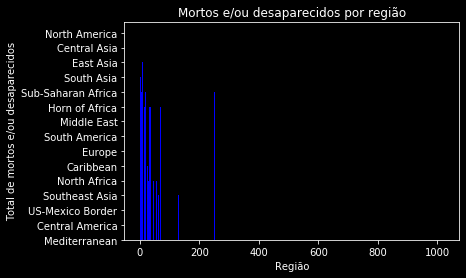

In [352]:
#Análise 2: Qual região teve mais migrantes mortos ou desaparecidos?
# A partir do gráfico abaixo, observamos que a região com maior mortos e/ou desaparecidos foi ???????.

???? preciso categorizar as regiões

plt.bar(migrantes.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,migrantes.REGIAO_INCIDENTE,color='blue')

plt.xlabel("Região")
plt.ylabel("Total de mortos e/ou desaparecidos")
plt.title("Mortos e/ou desaparecidos por região")

Text(0.5, 1.0, 'QTDE de homens, mulheres e crianças mortas (Tentativa 2)')

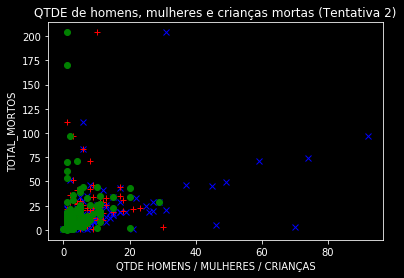

In [351]:
#Análise 3: Houve mais morte de homens, mulheres ou crianças? 
# A partir do gráfico abaixo, observamos que morreram mais crianças, seguindo dos homens e depois as mulheres.


plt.plot(migrantes.QTDE_HOMENS,migrantes.TOTAL_MIGRANTES_MORTOS,'bx')
plt.plot(migrantes.QTDE_MULHERES,migrantes.TOTAL_MIGRANTES_MORTOS,'r+')
plt.plot(migrantes.QTDE_CRIANCAS,migrantes.TOTAL_MIGRANTES_MORTOS,'go')

#plt.bar(migrantes.TOTAL_MIGRANTES_MORTOS,migrantes.QTDE_HOMENS,color='yellow')
#plt.bar(migrantes.TOTAL_MIGRANTES_MORTOS,migrantes.QTDE_MULHERES,color='PINK')
#plt.bar(migrantes.TOTAL_MIGRANTES_MORTOS,migrantes.QTDE_CRIANCAS,color='green')

plt.xlabel("QTDE HOMENS / MULHERES / CRIANÇAS")
plt.ylabel("TOTAL_MORTOS")
plt.title("QTDE de homens, mulheres e crianças mortas (Tentativa 2)")


In [291]:
(migrantes.sum() / migrantes.shape[0]).sort_values(ascending=False)
# (migrantes.isnull().sum() / migrantes.shape[0]).sort_values(ascending=False)

In [240]:
# Variável contínua: 'TOTAL_MIGRANTES_MORTOS' (% do total que está morto)

plt.bar(migrantes_amostra.TOTAL_MIGRANTES_MORTOS,migrantes_amostra.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,color='yellow')

plt.ylabel("TOTAL MORTOS")
plt.xlabel("TOTAL MORTOS  DESAPARECIDOS")
plt.title("Total migrantes mortos x Total migrantes mortos e desaparecidos")

In [239]:
# Variável contínua: 'TOTAL_MIGRANTES_DESAPARECIDOS' (% do total que está desparecido)
width =0.5
plt.bar(migrantes_amostra.TOTAL_MIGRANTES_DESAPARECIDOS,migrantes_amostra.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,width,color='green') #(x,y)

plt.ylabel("TOTAL MORTOS")
plt.xlabel("TOTAL DESAPARECIDOS")
plt.title("Total desaparecidos x Total mortos e desaparecidos")


In [243]:
# Variável contínua: 'TOTAL_sobreviventes (% do total que sobreviveu)
width =0.5
plt.bar(migrantes_amostra.QTDE_SOBREVIVENTES,migrantes_amostra.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,width,color='green') #(x,y)

plt.ylabel("TOTAL MORTOS")
plt.xlabel("Qtde Sobreviventes")
plt.title("Total sobreviventes x Total mortos e desaparecidos")


In [246]:
# Variável contínua: 'QTDE_MULHERES' (% do total que são mulheres)
width =0.5
plt.bar(migrantes_amostra.QTDE_MULHERES,migrantes_amostra.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,width,color='green') #(x,y)

plt.ylabel("TOTAL MORTOS")
plt.xlabel("Qtde mulheres mortas")
plt.title("Total mulheres mortas x Total mortos e desaparecidos")

In [247]:
# Variável contínua: 'QTDE_HOMENS' (% do total que são homens)
width =0.5
plt.bar(migrantes_amostra.QTDE_HOMENS,migrantes_amostra.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,width,color='green') #(x,y)

plt.ylabel("TOTAL MORTOS")
plt.xlabel("Qtde homens mortas")
plt.title("Total homens mortas x Total mortos e desaparecidos")

In [256]:
# Variável contínua: 'QTDE_CRIANCAS' (% do total que são crianças)
width =0.5
#plt.plot(migrantes_amostra.QTDE_CRIANCAS,migrantes_amostra.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,width,color='green') #(x,y)

plt.scatter(migrantes_amostra.QTDE_CRIANCAS, migrantes_amostra.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS)

plt.ylabel("TOTAL MORTOS")
plt.xlabel("Qtde crianças mortas")
plt.title("Total crianças mortas x Total mortos e desaparecidos")



In [264]:

migrantes_amostra.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS.describe()

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [0]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

no seu exemplo, uma possivel analise dessa natureza poderia ser:
total de fatalidades por regiao e mes; ou
total de fatalidades por causa e local

In [ ]:
# Agrupar por REGIAO_INCIDENTE




#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [0]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [0]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [0]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*